In [1]:
import numpy as np
import pandas as pd
import sklearn
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
df =  pd.read_csv('/content/BubbleGrowth_vs_Time.xlsx - Final_Data (1).csv')
df.head()

,pressure(bar),heat flux(kW/m2),mass fluxkg/(m2⋅s),sub cooling,fluid,channel dia(mm),flow/pool,d/dMax,t/tMax
0,1.11,173.0,495.0,6.5,water,13.33,flow,0.154977,0.004673
1,1.11,173.0,495.0,6.5,water,13.33,flow,0.215351,0.009346
2,1.11,173.0,495.0,6.5,water,13.33,flow,0.260160,0.014019
3,1.11,173.0,495.0,6.5,water,13.33,flow,0.296914,0.018692
4,1.11,173.0,495.0,6.5,water,13.33,flow,0.328518,0.023364


In [26]:
df =df.drop(['fluid','flow/pool'],axis =1)

In [27]:
df.head()

,pressure(bar),heat flux(kW/m2),mass fluxkg/(m2⋅s),sub cooling,channel dia(mm),d/dMax,t/tMax
0,1.11,173.0,495.0,6.5,13.33,0.154977,0.004673
1,1.11,173.0,495.0,6.5,13.33,0.215351,0.009346
2,1.11,173.0,495.0,6.5,13.33,0.260160,0.014019
3,1.11,173.0,495.0,6.5,13.33,0.296914,0.018692
4,1.11,173.0,495.0,6.5,13.33,0.328518,0.023364


In [46]:
df.describe()

,pressure(bar),heat flux(kW/m2),mass fluxkg/(m2⋅s),sub cooling,channel dia(mm),d/dMax,t/tMax
count,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000,16246.000000
mean,2.235211,226.092350,443.445677,17.268306,9.913098,0.758441,0.482936
std,2.088518,165.894274,288.310740,8.888022,5.438061,0.257563,0.322945
min,0.960000,0.000045,0.464000,2.000000,0.009660,-0.289157,-1.666651
25%,1.000000,148.000000,216.400000,11.200000,3.846000,0.597614,0.214047
50%,1.100000,200.000000,386.000000,15.400000,13.330000,0.854607,0.449041
75%,2.450000,300.000000,501.000000,20.675000,13.330000,0.977855,0.740741
max,10.400000,1200.000000,1170.000000,60.000000,54.550000,1.000000,2.510819


In [31]:
df =df.dropna()

In [33]:
X  =  df.drop('t/tMax',axis =1)
y = df['t/tMax']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [37]:
model = XGBRegressor()

In [14]:
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'gamma': [0, 0.1]
}

In [15]:
from sklearn.model_selection import GridSearchCV

In [38]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
m_ex = GridSearchCV(model , param_grid , cv = 2 , verbose = 2)
m_ex.fit(x_train, y_train)
%timeit

Fitting 2 folds for each of 288 candidates, totalling 576 fits
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_dep

In [42]:
m_ex.get_params()

{'cv': 2,
 'error_score': nan,
 'estimator__objective': 'reg:squarederror',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__callbacks': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__device': None,
 'estimator__early_stopping_rounds': None,
 'estimator__enable_categorical': False,
 'estimator__eval_metric': None,
 'estimator__feature_types': None,
 'estimator__gamma': None,
 'estimator__grow_policy': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_bin': None,
 'estimator__max_cat_threshold': None,
 'estimator__max_cat_to_onehot': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__max_leaves': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__multi_strategy': None,
 'estimato

In [43]:
best_model = m_ex.best_estimator_


In [44]:
y_pred = best_model.predict(x_test)


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.01741062172220149
Mean Absolute Error: 0.08822787164736845
R-squared: 0.8303842764320705


In [49]:
count = 0
x = 0
for i in y_test:
    x = x+1
    if i == 1:
        print(x)
        count = count+ 1
        if count == 3:
            break

102
202
364


In [54]:
test_perdicted1 = y_pred[:102]
test_ytest1 =y_test[:102]

test_perdicted2 = y_pred[102:202]
test_ytest2 =y_test[102:202]

test_perdicted3 = y_pred[453:679]
test_ytest3 =y_test[453:679]

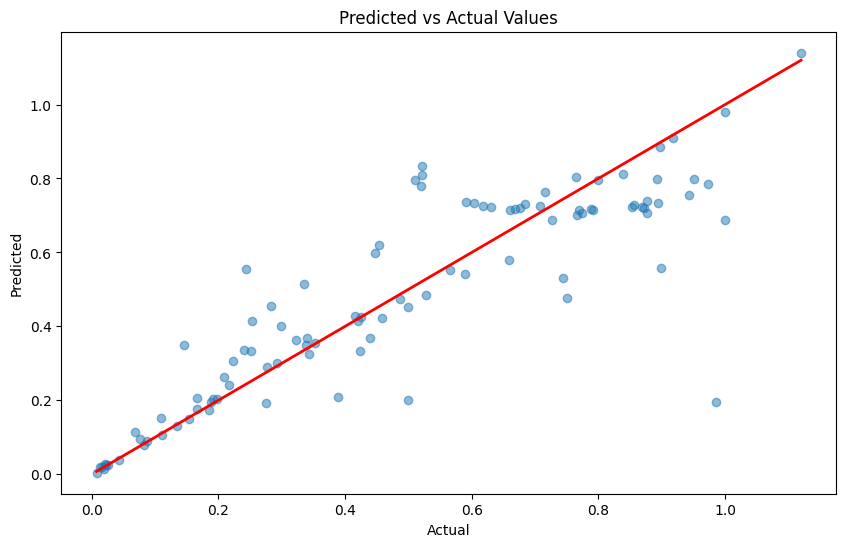

In [56]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(test_ytest2, test_perdicted2, alpha=0.5)
plt.plot([min(test_ytest2), max(test_ytest2)], [min(test_ytest2), max(test_ytest2)], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.show()
